In [11]:
!wget https://graphicwg.irafm.osu.cz/storage/retinopathy.zip --no-check-certificate
!unzip retinopathy.zip

Výstupní stream byl oříznut na posledních 5000 řádků.
  inflating: train_extracted/44261_right.jpeg  
  inflating: train_extracted/44262_left.jpeg  
  inflating: train_extracted/44262_right.jpeg  
  inflating: train_extracted/44263_left.jpeg  
  inflating: train_extracted/44263_right.jpeg  
  inflating: train_extracted/44264_left.jpeg  
  inflating: train_extracted/44264_right.jpeg  
  inflating: train_extracted/44265_left.jpeg  
  inflating: train_extracted/44265_right.jpeg  
  inflating: train_extracted/44267_left.jpeg  
  inflating: train_extracted/44267_right.jpeg  
  inflating: train_extracted/44268_left.jpeg  
  inflating: train_extracted/44268_right.jpeg  
  inflating: train_extracted/44275_left.jpeg  
  inflating: train_extracted/44275_right.jpeg  
  inflating: train_extracted/44278_left.jpeg  
  inflating: train_extracted/44278_right.jpeg  
  inflating: train_extracted/44280_left.jpeg  
  inflating: train_extracted/44280_right.jpeg  
  inflating: train_extracted/44281_left.jpe

In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.applications.efficientnet import EfficientNetB0
import numpy as np

In [13]:
model = EfficientNetB0()

In [14]:
df = pd.read_csv("trainLabels.csv")

In [19]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_generator = datagen.flow_from_dataframe(
    dataframe = df,
    x_col =  "image",
    y_col = "level",
    target_size = (224,224),
    directory = "train_extracted/",
    class_mode = "raw"
)

Found 35126 validated image filenames.


In [20]:
model = EfficientNetB0()
model.compile(loss = 'sparse_categorical_crossentropy', optimizer ='Adam', metrics=['sparse_categorical_accuracy'])
model.fit(train_generator, epochs=1)

1098/1098 [==============================] - 360s 320ms/step - loss: 0.9688 - sparse_categorical_accuracy: 0.7228


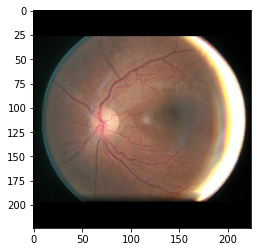

label je:  0


NameError: ignored

In [23]:
imgs, labels = train_generator.next()
predfs = model.predict(imgs)

plt.imshow(imgs[0].astype(np.int32))
plt.show()
print("label je: ", labels[0])
print("predikce je: ", np.argmax(preds[0]))